In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = nn.LeakyReLU(0.2)(self.conv1(x))
        x = nn.LeakyReLU(0.2)(self.conv2(x))
        x = x.view(x.size(0), -1)
        x=nn.LeakyReLU(0.2)(self.fc1(x))
        x = self.fc2(x)
        return torch.sigmoid(x)

# Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(100, 256)
        self.fc2 = nn.Linear(256,128*7*7)
        self.deconv1 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
        self.deconv2 = nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = x.view(x.size(0), 128, 7, 7)
        x = nn.ReLU()(self.deconv1(x))
        x = nn.Tanh()(self.deconv2(x))
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the data
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 316249277.33it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 42971157.79it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 44612322.10it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1719516.99it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
discriminator = Discriminator().to(device)
generator = Generator().to(device)

# Loss function and optimizers
adversarial_loss = nn.BCELoss()
generator_loss = nn.MSELoss()
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

In [ ]:
def plot_samples(noise, generator):
    fake_images = generator(noise)
    fig, ax = plt.subplots(1, 5)
    for i in range(5):
      ax[i].imshow((fake_images[i].detach().cpu().reshape(28, 28) + 1) * 0.5, cmap='gray', vmin=0, vmax=1)
      ax[i].axis('off')

    plt.show()
    plt.close()

  0%|          | 0/20 [00:00<?, ?it/s]


Generator Loss: 0.8896372  Discriminator Loss: 0.13123208


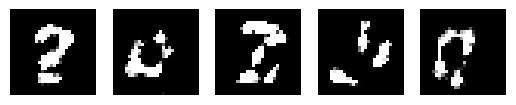

  5%|▌         | 1/20 [00:30<09:42, 30.67s/it]


Generator Loss: 0.7382867  Discriminator Loss: 0.44159728


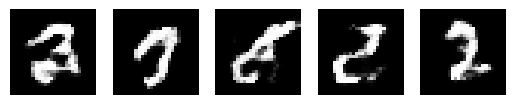

 10%|█         | 2/20 [00:52<07:41, 25.65s/it]


Generator Loss: 0.6224494  Discriminator Loss: 0.3977936


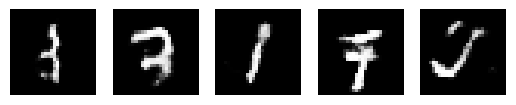

 15%|█▌        | 3/20 [01:15<06:55, 24.45s/it]


Generator Loss: 0.85657406  Discriminator Loss: 0.24319871


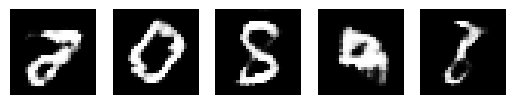

 20%|██        | 4/20 [01:38<06:17, 23.59s/it]


Generator Loss: 0.7148212  Discriminator Loss: 0.20636946


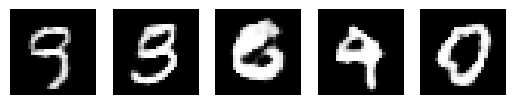

 25%|██▌       | 5/20 [01:59<05:43, 22.92s/it]


Generator Loss: 0.79312325  Discriminator Loss: 0.30010813


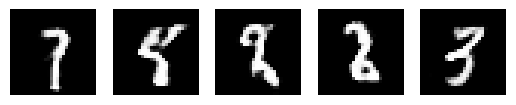

 30%|███       | 6/20 [02:22<05:18, 22.75s/it]


Generator Loss: 0.640391  Discriminator Loss: 0.3123419


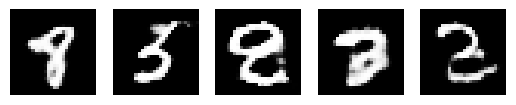

 35%|███▌      | 7/20 [02:44<04:53, 22.56s/it]


Generator Loss: 0.63388085  Discriminator Loss: 0.28677705


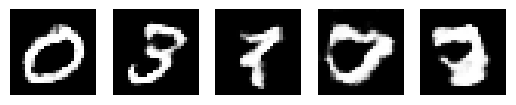

 40%|████      | 8/20 [03:06<04:30, 22.52s/it]


Generator Loss: 0.80410063  Discriminator Loss: 0.30376875


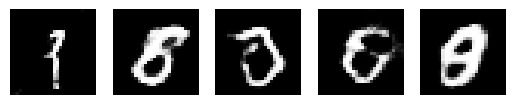

 45%|████▌     | 9/20 [03:29<04:07, 22.49s/it]


Generator Loss: 0.67510986  Discriminator Loss: 0.33516923


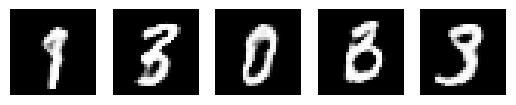

 50%|█████     | 10/20 [03:51<03:44, 22.47s/it]


Generator Loss: 0.7355591  Discriminator Loss: 0.25118855


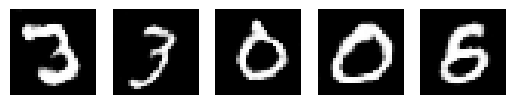

 55%|█████▌    | 11/20 [04:13<03:20, 22.31s/it]


Generator Loss: 0.6184759  Discriminator Loss: 0.313785


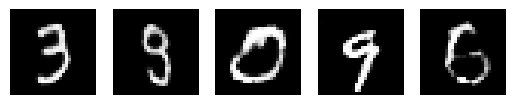

 60%|██████    | 12/20 [04:36<02:59, 22.40s/it]


Generator Loss: 0.7578946  Discriminator Loss: 0.20982675


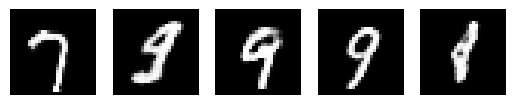

 65%|██████▌   | 13/20 [04:58<02:36, 22.34s/it]


Generator Loss: 0.8022964  Discriminator Loss: 0.1420627


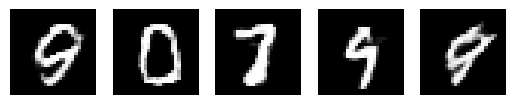

 70%|███████   | 14/20 [05:21<02:14, 22.40s/it]


Generator Loss: 0.6664933  Discriminator Loss: 0.2705716


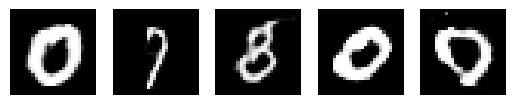

 75%|███████▌  | 15/20 [05:43<01:52, 22.44s/it]


Generator Loss: 0.8325884  Discriminator Loss: 0.38091663


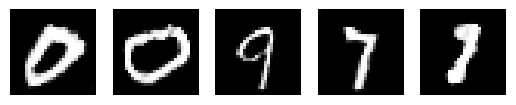

 80%|████████  | 16/20 [06:05<01:29, 22.39s/it]


Generator Loss: 0.7616415  Discriminator Loss: 0.32805163


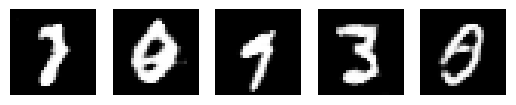

 85%|████████▌ | 17/20 [06:27<01:06, 22.26s/it]


Generator Loss: 0.8128252  Discriminator Loss: 0.18166067


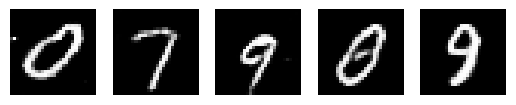

 90%|█████████ | 18/20 [06:50<00:44, 22.28s/it]


Generator Loss: 0.7112205  Discriminator Loss: 0.13621366


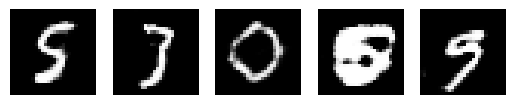

 95%|█████████▌| 19/20 [07:12<00:22, 22.39s/it]


Generator Loss: 0.7543433  Discriminator Loss: 0.24545209


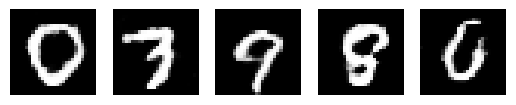

100%|██████████| 20/20 [07:35<00:00, 22.77s/it]


In [ ]:
for epoch in tqdm(range(20)):
    for i, (real_images, _) in enumerate(mnist_loader):
        # Move data to the device
        real_images = real_images.to(device)
        real_labels = torch.ones(real_images.size(0), device=device)
        fake_labels = torch.zeros(real_images.size(0), device=device)

        # Training the discriminator
        d_optimizer.zero_grad()

        # Compute the discriminator's loss on real images
        real_output = discriminator(real_images)
        real_labels = real_labels.unsqueeze(1)
        d_loss_real = adversarial_loss(real_output, real_labels)
        #d_loss_real.backward()

        # Generate fake images
        noise = torch.randn(real_images.size(0), 100, device=device)
        fake_images = generator(noise)

        # Compute the discriminator's loss on fake images
        fake_output = discriminator(fake_images)
        fake_labels = fake_labels.unsqueeze(1)
        d_loss_fake = adversarial_loss(fake_output, fake_labels)
        #d_loss_fake.backward()

        d_loss = (d_loss_real + d_loss_fake) / 2
        d_loss.backward()

        d_optimizer.step()

        # Training the generator
        g_optimizer.zero_grad()
        noise = torch.randn(real_images.size(0), 100).to(device)
        fake_images = generator(noise).to(device)

        # Compute the generator's loss
        fake_output = discriminator(fake_images)
        g_loss = generator_loss(fake_output, real_labels)

        g_loss.backward()

        g_optimizer.step()


    print("\nGenerator Loss:", g_loss.cpu().detach().numpy(), " Discriminator Loss:", d_loss.cpu().detach().numpy())
    plot_samples(noise, generator)